In [9]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import pickle

# df = pd.read_csv('outliers/df_raw.csv')
df = pd.read_csv('outliers/final/df.csv')


with open(f'outliers/data.pickle', 'rb') as handle:
    data = pickle.load(handle)
with open(f'outliers/process.pickle', 'rb') as handle:
    process = pickle.load(handle)

X = pd.concat([data['X_train'], data['X_test'], data['X_val']])
y = np.concatenate([data['y_train'], data['y_test'], data['y_val']])
Xy = X.copy()
Xy['META__revenue'] = y

def print_box_plot(col, name):
    print(name)
    fig = plt.figure(figsize =(10, 7)) 
    plt.boxplot(col[~pd.isna(col)]) 
    plt.title(name)
    plt.show() 

In [4]:
[c for c in df.columns if 'profit' in c]

['META__profitability',
 'META__year_avg_profitability',
 'cast_1_avg_profit',
 'cast_2_avg_profit',
 'cast_3_avg_profit',
 'cast_4_avg_profit',
 'cast_5_avg_profit',
 'cast_6_avg_profit',
 'cast_7_avg_profit',
 'cast_8_avg_profit',
 'production_company_1_avg_profit',
 'production_company_2_avg_profit',
 'production_company_3_avg_profit',
 'collection_avg_profit',
 'crew__production__producer_1_avg_profit',
 'crew__production__producer_2_avg_profit',
 'crew__sound__music_editor_avg_profit',
 'crew__sound__original_music_composer_avg_profit',
 'crew__sound__sound_designer_avg_profit',
 'crew__sound__sound_effects_editor_avg_profit',
 'crew__sound__sound_re_recording_mixer_avg_profit',
 'crew__sound__supervising_sound_editor_avg_profit',
 'crew__directing__director_avg_profit',
 'crew__directing__script_supervisor_avg_profit',
 'crew__production__casting_avg_profit',
 'crew__production__executive_producer_avg_profit',
 'crew__editing__editor_avg_profit',
 'crew__costume__costume_designer

In [17]:
cols = ['budget', 'runtime', 'competition', 'META__revenue'] + [c for c in df.columns if 'profit' in c]

In [19]:
def print_box_plot(col, name):
    print(name)
    fig = plt.figure(figsize =(10, 7)) 
    plt.boxplot(col[~pd.isna(col)]) 
    plt.title(name)
    plt.show() 

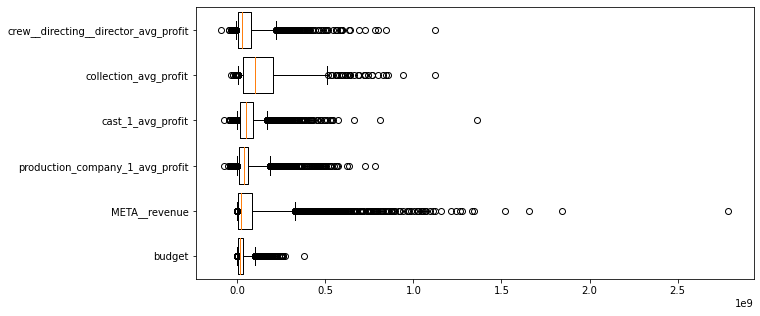

In [105]:
# for c in ['budget', 'runtime', 'competition', 'META__revenue'] + [c for c in df.columns if 'profit' in c]:
lists = []
names = []
# for c in ['budget', 'runtime', 'competition', 'META__revenue']:
# for c in ['budget', 'META__revenue'] + [c for c in df.columns if c.endswith('avg_profit')]:
for c in ['budget', 'META__revenue', 'production_company_1_avg_profit', 'cast_1_avg_profit', 'collection_avg_profit', 'crew__directing__director_avg_profit']:
    d = df[c].values[~pd.isna(df[c].values)]
    if type(d[0]) != str:
        lists.append(d)
        names.append(c)
fig = plt.figure(figsize =(10, 5))
plt.boxplot(lists, vert=False, labels=names, whis=[5,95], widths=0.8)
# plt.title('Box plot examples for columns derived from revenue and budget')
plt.savefig('images/boxplotfromrevenue.jpg', format='jpg', bbox_inches='tight', quality=100)
plt.show()

        # print_box_plot(df[c].values, c)

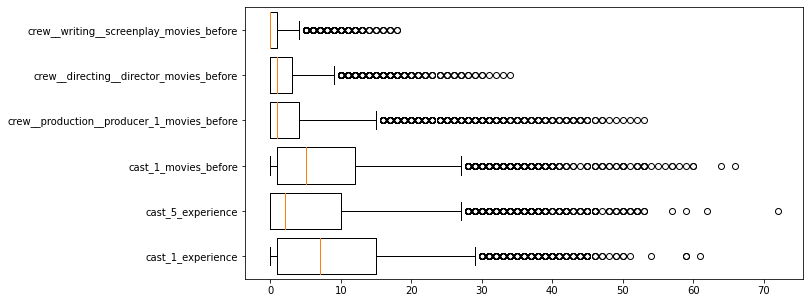

In [104]:
lists = []
names = []
for c in ['cast_1_experience', 'cast_5_experience', 'cast_1_movies_before', 'crew__production__producer_1_movies_before', 'crew__directing__director_movies_before', 'crew__writing__screenplay_movies_before']:
    d = df[c].values[~pd.isna(df[c].values)]
    if type(d[0]) != str:
        lists.append(d)
        names.append(c)
fig = plt.figure(figsize =(10, 5))
plt.boxplot(lists, vert=False, labels=names, whis=[5,95], widths=0.8)
# plt.title('Box plot examples for columns derived from number of movies')
plt.savefig('images/boxplotfromnumbers.jpg', format='jpg', bbox_inches='tight', quality=100)
plt.show()

In [75]:
list(df.columns)

['id',
 'budget',
 'runtime',
 'spoken_languages',
 'META__year',
 'META__month',
 'META__day',
 'weekend',
 'META__collection_name',
 'META__cast_1',
 'META__cast_2',
 'META__cast_3',
 'META__cast_4',
 'META__cast_5',
 'META__cast_6',
 'META__cast_7',
 'META__cast_8',
 'META__crew__sound__music_editor',
 'META__crew__sound__original_music_composer',
 'META__crew__sound__sound_designer',
 'META__crew__sound__sound_effects_editor',
 'META__crew__sound__sound_re_recording_mixer',
 'META__crew__sound__supervising_sound_editor',
 'META__crew__directing__director',
 'META__crew__directing__script_supervisor',
 'META__crew__production__casting',
 'META__crew__production__executive_producer',
 'META__crew__production__producer_1',
 'META__crew__production__producer_2',
 'META__crew__editing__editor',
 'META__crew__costume__costume_designer',
 'META__crew__costume__costume_supervisor',
 'META__crew__costume__makeup_artist',
 'META__crew__crew__stunt_coordinator',
 'META__crew__writing__screenp

In [ ]:
for c in ['budget', 'META__revenue', 'production_company_1_avg_profit', 'cast_1_avg_profit', 'collection_avg_profit', 'crew__directing__director_avg_profit']:
    d = df[c].values[~pd.isna(df[c].values)]
    if type(d[0]) != str:
        lists.append(d)
        names.append(c)
fig = plt.figure(figsize =(10, 5))
plt.boxplot(lists, vert=False, labels=names, whis=[5,95], widths=0.8)
plt.title('Box plot examples for columns derived from revenue and budget')
plt.show()

In [ ]:
# for c in ['budget', 'runtime', 'competition', 'META__revenue', 'META__profitability', 'META__year_avg_profitability']:
for c in Xy.columns:
    if np.unique(Xy[c].values).shape[0] > 2:
        print_box_plot(Xy[c].values, c)

In [12]:
print(len([c for c in Xy.columns if np.unique(Xy[c].values).shape[0] > 2 and not 'gender' in c and not 'day' in c and not 'month' in c and not 'movies_before' in c]))

94
